Việc đo lường các yếu tố ESG đã trở thành một thành phần quan trọng trong việc thúc đẩy tính bền vững doanh nghiệp. Hệ thống đo lường hiệu quả giúp doanh nghiệp giám sát tiến độ, xác định các lĩnh vực cần cải thiện và điều chỉnh hoạt động phù hợp với mục tiêu phát triển bền vững.

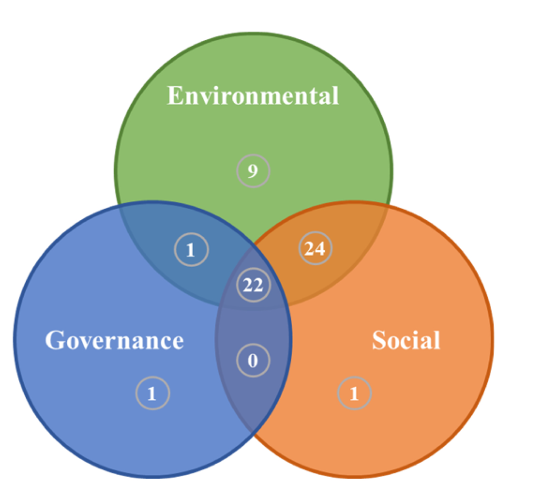

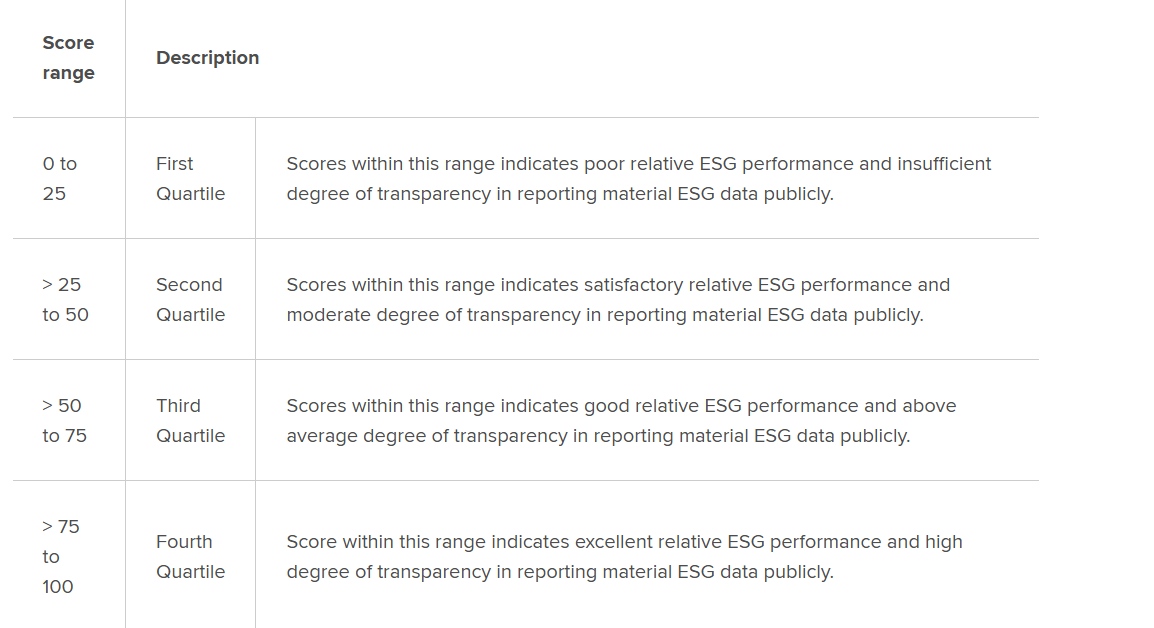

TÓM TẮT 6 BƯỚC TÍNH ĐIỂM ESG/ESGC:
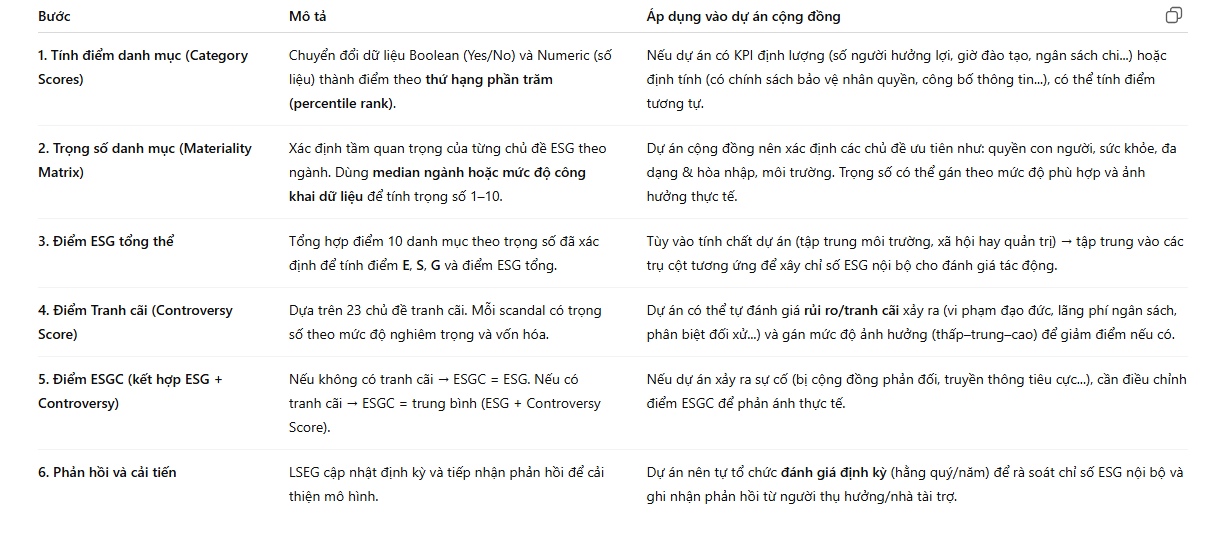

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('ESGData.csv')

In [3]:
df.head()

,Country Name,Country Code,Series Name,Series Code,2023 [YR2023],2010 [YR2010],2022 [YR2022],2020 [YR2020],2021 [YR2021],2018 [YR2018],...,2011 [YR2011],2007 [YR2007],2006 [YR2006],2005 [YR2005],2004 [YR2004],2003 [YR2003],2002 [YR2002],2000 [YR2000],2001 [YR2001],1999 [YR1999]
0,Viet Nam,VNM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,..,1.73220165898548,..,3.67644008813984,..,3.01471126646524,...,1.76542002111917,1.24037972603117,1.13004962371265,1.11097272687199,1.03329525144851,0.870242185335343,0.824577094197254,0.648189364148685,0.710648706741106,0.594093626860771
1,Viet Nam,VNM,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,..,27.10947116,..,..,..,20.5326508,...,23.78443184,..,..,26.45818252,..,..,..,25.66637392,..,..
2,Viet Nam,VNM,GHG net emissions/removals by LUCF (Mt of CO2 ...,EN.CLC.GHGR.MT.CE,..,..,..,..,..,..,...,..,..,..,..,..,..,..,15.1047,..,..
3,Viet Nam,VNM,Methane emissions (metric tons of CO2 equivale...,EN.ATM.METH.PC,..,0.941878610214466,..,0.823800531067753,..,0.861817848895947,...,0.940693455147945,0.933354999026749,0.930255158317034,0.911732077475315,0.891113492938211,0.850417347722469,0.834171654660479,0.824082897434571,0.82179775565536,0.811001381488358
4,Viet Nam,VNM,Nitrous oxide emissions (metric tons of CO2 eq...,EN.ATM.NOXE.PC,..,0.246583414455835,..,0.277629588855761,..,0.263679863093381,...,0.230787465595157,0.24629248421842,0.230920699734848,0.235817675751375,0.24718799295751,0.23888967310242,0.225472113223744,0.237423332437397,0.215703601968268,0.228629648849383


In [4]:
# Kiểm tra các giá trị trùng lặp trong Series Name
duplicates = df['Series Name'].duplicated()
print(f"Có {duplicates.sum()} giá trị trùng lặp")
print(duplicates)

# Xóa các giá trị trùng lặp
df = df.drop_duplicates(subset='Series Name')  
print(f"Số lượng dòng sau khi xóa trùng lặp: {len(df)}") 

Có 4 giá trị trùng lặp
0     False
1     False
2     False
3     False
4     False
      ...  
71    False
72     True
73     True
74     True
75     True
Name: Series Name, Length: 76, dtype: bool
Số lượng dòng sau khi xóa trùng lặp: 72


In [5]:
year_columns = [col for col in df.columns if 'YR' in col]

df_transformed = pd.DataFrame()

for year_col in year_columns:
    year = year_col.split('[')[1].split(']')[0].replace('YR', '')
    temp_df = df[['Series Name', year_col]].copy()
    temp_df['Year'] = year
    temp_df.rename(columns={year_col: 'Value'}, inplace=True)
    df_transformed = pd.concat([df_transformed, temp_df])

# Pivot để có Series Name làm cột và Year 
final_df = df_transformed.pivot(index='Year', columns='Series Name', values='Value')

print(final_df)

Series Name  NaN  \
Year               
1999         NaN   
2000         NaN   
2001         NaN   
2002         NaN   
2003         NaN   
2004         NaN   
2005         NaN   
2006         NaN   
2007         NaN   
2010         NaN   
2011         NaN   
2012         NaN   
2013         NaN   
2014         NaN   
2015         NaN   
2016         NaN   
2017         NaN   
2018         NaN   
2019         NaN   
2020         NaN   
2021         NaN   
2022         NaN   
2023         NaN   

Series Name Access to clean fuels and technologies for cooking (% of population)  \
Year                                                                               
1999                                                        ..                     
2000                                                      13.4                     
2001                                                      16.1                     
2002                                                      19.1                 

In [6]:
final_df.head()


Series Name,NaN,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)","Annualized average growth rate in per capita real survey mean consumption or income, total population (%)",CO2 emissions (metric tons per capita),...,"School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)",Scientific and technical journal articles,Standardised Precipitation-Evapotranspiration Index,Strength of legal rights index (0=weak to 12=strong),Terrestrial and marine protected areas (% of total territorial area),Tree Cover Loss (hectares),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Unmet need for contraception (% of married women ages 15-49),Voice and Accountability: Estimate
Year,,,,,,,,,,,,,,,,,,,,,
1999,NaN,..,86.9944381713867,2.87244647071265,0,25.8471842452917,25.4344379935091,19.4158366256747,..,0.594093626860771,...,114.000846862793,..,199.92,1.511528705,..,..,..,2.33,..,..
2000,NaN,13.4,88.2350997924805,5.90885741480011,0,28.2260657107953,24.5345819955349,19.9805241778421,..,0.648189364148685,...,112.737327575684,..,202.08,-0.369619775,..,..,..,2.26,..,-1.23829925060272
2001,NaN,16.1,88.9198989868164,4.57087072173999,0,30.4831399273522,23.2410475903552,20.5489956040287,..,0.710648706741106,...,111.035148620605,..,241.05,1.648637481,..,..,..,2.76,..,..
2002,NaN,19.1,89.1,3.76063711024843,0,30.4459829335051,23.0294421776834,21.1174670302153,..,0.824577094197254,...,109.37557220459,..,234.14,1.221514134,..,..,49625,2.12,6.6,-1.44881856441498
2003,NaN,22.1,90.270866394043,3.94793969682949,0,30.7575708710936,22.5424367056108,21.6372489010072,..,0.870242185335343,...,107.745170593262,..,298.21,-1.578529806,..,..,43008,2.25,..,-1.47438275814056


In [7]:
# Clean data 
# Xóa các giá trị NaN
final_df.isna().sum()

# Xóa các cột có giá trị NaN
final_df = final_df.dropna(axis=1, how='all')

In [8]:
final_df.isna().sum()

Series Name
Access to clean fuels and technologies for cooking (% of population)    0
Access to electricity (% of population)                                 0
Adjusted savings: natural resources depletion (% of GNI)                0
Adjusted savings: net forest depletion (% of GNI)                       0
Agricultural land (% of land area)                                      0
                                                                       ..
Terrestrial and marine protected areas (% of total territorial area)    0
Tree Cover Loss (hectares)                                              0
Unemployment, total (% of total labor force) (modeled ILO estimate)     0
Unmet need for contraception (% of married women ages 15-49)            0
Voice and Accountability: Estimate                                      0
Length: 71, dtype: int64

In [9]:
# Số cột, số dòng
print(f"Số cột: {final_df.shape[1]}, Số dòng: {final_df.shape[0]}")

Số cột: 71, Số dòng: 23


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1999 to 2023
Data columns (total 71 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Access to clean fuels and technologies for cooking (% of population)                                       23 non-null     object
 1   Access to electricity (% of population)                                                                    23 non-null     object
 2   Adjusted savings: natural resources depletion (% of GNI)                                                   23 non-null     object
 3   Adjusted savings: net forest depletion (% of GNI)                                                          23 non-null     object
 4   Agricultural land (% of land area)                                                

<table>
  <thead>
    <tr>
      <th>Chỉ số</th>
      <th>Mô tả</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>Access to clean fuels and technologies for cooking</td><td>Tỷ lệ dân số tiếp cận nhiên liệu sạch và công nghệ nấu ăn</td></tr>
    <tr><td>CO2 emissions</td><td>Lượng phát thải CO2 bình quân đầu người</td></tr>
    <tr><td>PM2.5 air pollution</td><td>Ô nhiễm không khí PM2.5, mức độ tiếp xúc trung bình hàng năm</td></tr>
    <tr><td>GHG net emissions/removals by LUCF</td><td>Phát thải ròng khí nhà kính từ thay đổi sử dụng đất và lâm nghiệp</td></tr>
    <tr><td>Methane emissions</td><td>Phát thải khí methane (tính bằng CO2 tương đương trên đầu người)</td></tr>
    <tr><td>Nitrous oxide emissions</td><td>Phát thải khí N2O (tính bằng CO2 tương đương trên đầu người)</td></tr>
    <tr><td>Energy imports</td><td>Tỷ lệ nhập khẩu năng lượng ròng</td></tr>
    <tr><td>Energy intensity level</td><td>Cường độ sử dụng năng lượng sơ cấp</td></tr>
    <tr><td>Fossil fuel energy consumption</td><td>Tỷ lệ tiêu thụ năng lượng từ nhiên liệu hóa thạch</td></tr>
    <tr><td>Renewable electricity output</td><td>Tỷ lệ sản lượng điện tái tạo</td></tr>
    <tr><td>Renewable energy consumption</td><td>Tỷ lệ tiêu thụ năng lượng tái tạo</td></tr>
    <tr><td>Forest area</td><td>Tỷ lệ diện tích rừng</td></tr>
    <tr><td>Agricultural land</td><td>Tỷ lệ đất nông nghiệp</td></tr>
    <tr><td>Natural resources depletion</td><td>Mức độ suy thoái tài nguyên thiên nhiên</td></tr>
    <tr><td>Coastal protection</td><td>Chỉ số bảo vệ vùng bờ biển</td></tr>
    <tr><td>Water stress</td><td>Mức độ căng thẳng về nguồn nước ngọt</td></tr>
    <tr><td>Tree Cover Loss</td><td>Mất lớp phủ cây (hecta)</td></tr>
  </tbody>
</table>


<table>
  <thead>
    <tr>
      <th>Chỉ số</th>
      <th>Mô tả</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>Access to electricity</td><td>Tỷ lệ dân số tiếp cận điện</td></tr>
    <tr><td>People using safely managed drinking water</td><td>Tỷ lệ dân số sử dụng nước uống an toàn</td></tr>
    <tr><td>People using safely managed sanitation</td><td>Tỷ lệ dân số tiếp cận dịch vụ vệ sinh an toàn</td></tr>
    <tr><td>Literacy rate</td><td>Tỷ lệ biết chữ ở người trưởng thành</td></tr>
    <tr><td>School enrollment, primary</td><td>Tỷ lệ nhập học tiểu học</td></tr>
    <tr><td>School enrollment, gender parity index</td><td>Chỉ số bình đẳng giới trong giáo dục</td></tr>
    <tr><td>Government expenditure on education</td><td>Chi tiêu của chính phủ cho giáo dục</td></tr>
    <tr><td>Life expectancy</td><td>Tuổi thọ trung bình</td></tr>
    <tr><td>Mortality rate, under-5</td><td>Tỷ lệ tử vong trẻ em dưới 5 tuổi</td></tr>
    <tr><td>Hospital beds</td><td>Số giường bệnh viện trên 1000 người</td></tr>
    <tr><td>Food production index</td><td>Chỉ số sản xuất lương thực</td></tr>
    <tr><td>Fertility rate</td><td>Tỷ lệ sinh (số con trung bình/phụ nữ)</td></tr>
    <tr><td>Poverty headcount ratio</td><td>Tỷ lệ nghèo theo chuẩn quốc gia</td></tr>
    <tr><td>Gini index</td><td>Chỉ số đo lường bất bình đẳng thu nhập</td></tr>
    <tr><td>Income share held by lowest 20%</td><td>Tỷ lệ thu nhập của nhóm 20% nghèo nhất</td></tr>
    <tr><td>Labor force participation rate</td><td>Tỷ lệ tham gia lực lượng lao động</td></tr>
    <tr><td>Unemployment</td><td>Tỷ lệ thất nghiệp</td></tr>
    <tr><td>Population ages 65 and above</td><td>Tỷ lệ dân số trên 65 tuổi</td></tr>
    <tr><td>Prevalence of overweight</td><td>Tỷ lệ thừa cân ở người trưởng thành</td></tr>
    <tr><td>Prevalence of undernourishment</td><td>Tỷ lệ suy dinh dưỡng</td></tr>
  </tbody>
</table>


<table>
  <thead>
    <tr>
      <th>Chỉ số</th>
      <th>Mô tả</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>Control of Corruption</td><td>Chỉ số kiểm soát tham nhũng</td></tr>
    <tr><td>Government Effectiveness</td><td>Chỉ số hiệu quả của chính phủ</td></tr>
    <tr><td>Political Stability</td><td>Chỉ số ổn định chính trị và vắng mặt bạo lực/khủng bố</td></tr>
    <tr><td>Regulatory Quality</td><td>Chất lượng quy định pháp luật</td></tr>
    <tr><td>Rule of Law</td><td>Chỉ số pháp quyền</td></tr>
    <tr><td>Voice and Accountability</td><td>Chỉ số tiếng nói và trách nhiệm giải trình</td></tr>
    <tr><td>GDP growth</td><td>Tăng trưởng GDP hàng năm</td></tr>
    <tr><td>Research and development expenditure</td><td>Chi tiêu cho nghiên cứu và phát triển</td></tr>
    <tr><td>Patent applications</td><td>Số lượng đơn đăng ký sáng chế</td></tr>
    <tr><td>Scientific and technical journal articles</td><td>Số lượng bài báo khoa học và kỹ thuật</td></tr>
    <tr><td>Individuals using the Internet</td><td>Tỷ lệ dân số sử dụng Internet</td></tr>
    <tr><td>Strength of legal rights index</td><td>Chỉ số sức mạnh của quyền pháp lý</td></tr>
    <tr><td>Proportion of seats held by women</td><td>Tỷ lệ nữ giới trong quốc hội</td></tr>
    <tr><td>Ratio of female to male labor force participation</td><td>Tỷ lệ tham gia lực lượng lao động nữ so với nam</td></tr>
    <tr><td>Unmet need for contraception</td><td>Nhu cầu tránh thai chưa được đáp ứng</td></tr>
  </tbody>
</table>


<table>
  <thead>
    <tr>
      <th>Chỉ số</th>
      <th>Mô tả</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>Cooling Degree Days</td><td>Số ngày làm mát (chỉ số đo nhu cầu làm mát)</td></tr>
    <tr><td>Heating Degree Days</td><td>Số ngày sưởi ấm (chỉ số đo nhu cầu sưởi ấm)</td></tr>
    <tr><td>Heat Index 35</td><td>Chỉ số nhiệt độ cao</td></tr>
    <tr><td>Land Surface Temperature</td><td>Nhiệt độ bề mặt đất</td></tr>
    <tr><td>Standardised Precipitation-Evapotranspiration Index</td><td>Chỉ số lượng mưa và bốc hơi chuẩn hóa</td></tr>
  </tbody>
</table>


In [11]:
# Xử lý giá trị trùng lặp
final_df.duplicated().sum()

0

# XEM PHÂN PHỐI 

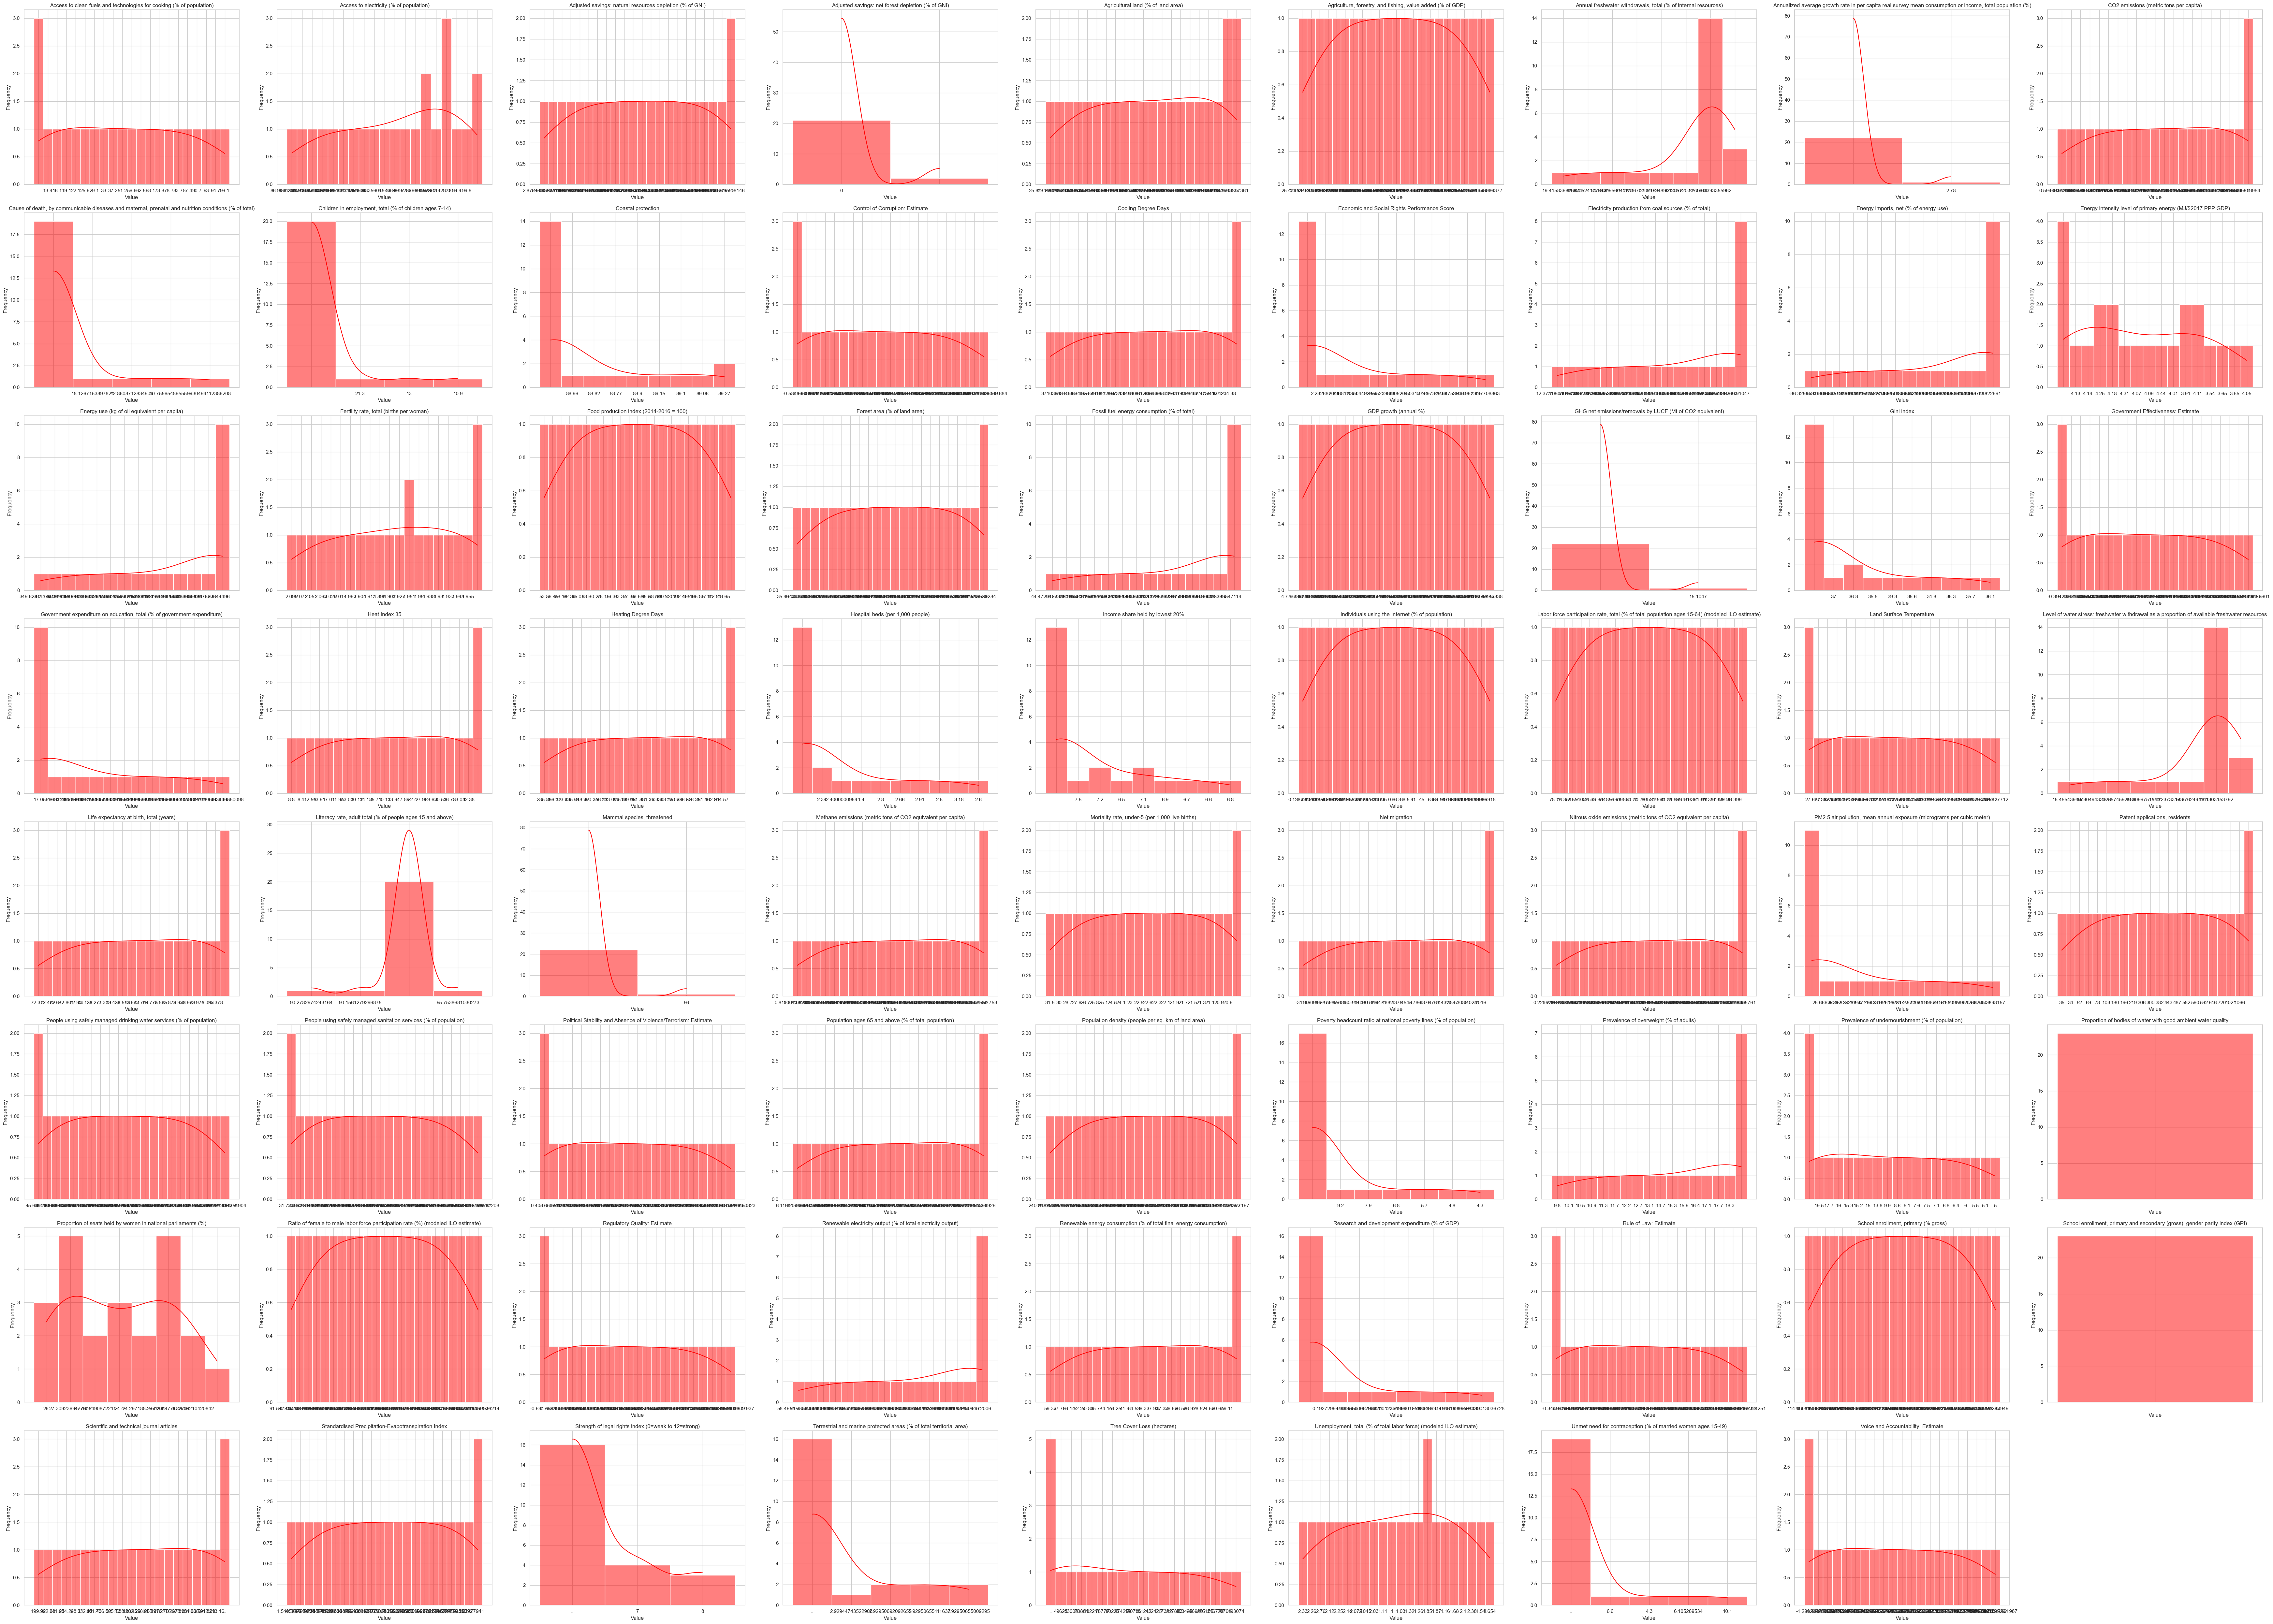

In [12]:
# Xem phân phối của tất cả các cột
sns.set(style="whitegrid")
plt.figure(figsize=(70, 50))

for i, column in enumerate(final_df.columns):
    plt.subplot(8, 9, i+1)
    sns.histplot(final_df[column].dropna(), kde=True, color='red')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [13]:
# Chuyển sang dạng số
final_df = final_df.apply(pd.to_numeric, errors='coerce')
# Kiểm tra lại các giá trị NaN
print(final_df.isna().sum())

# % mỗi giá trị NaN
nan_percentage = final_df.isna().mean() * 100
print(nan_percentage)


Series Name
Access to clean fuels and technologies for cooking (% of population)     3
Access to electricity (% of population)                                  2
Adjusted savings: natural resources depletion (% of GNI)                 2
Adjusted savings: net forest depletion (% of GNI)                        2
Agricultural land (% of land area)                                       2
                                                                        ..
Terrestrial and marine protected areas (% of total territorial area)    16
Tree Cover Loss (hectares)                                               5
Unemployment, total (% of total labor force) (modeled ILO estimate)      0
Unmet need for contraception (% of married women ages 15-49)            19
Voice and Accountability: Estimate                                       3
Length: 71, dtype: int64
Series Name
Access to clean fuels and technologies for cooking (% of population)    13.043478
Access to electricity (% of population)     

In [14]:
# Nếu tỉ lệ trên 15%, thì loại bỏ đặc trưng cột đó
columns_to_drop = nan_percentage[nan_percentage > 15].index
final_df = final_df.drop(columns=columns_to_drop)
print(f"Số cột sau khi loại bỏ: {final_df.shape[1]}")

Số cột sau khi loại bỏ: 42


In [15]:

# Thay Null bằng giá trị median 
final_df.fillna(final_df.median(), inplace=True)
# Kiểm tra lại các giá trị NaN
print(final_df.isna().sum())


Series Name
Access to clean fuels and technologies for cooking (% of population)                               0
Access to electricity (% of population)                                                            0
Adjusted savings: natural resources depletion (% of GNI)                                           0
Adjusted savings: net forest depletion (% of GNI)                                                  0
Agricultural land (% of land area)                                                                 0
Agriculture, forestry, and fishing, value added (% of GDP)                                         0
Annual freshwater withdrawals, total (% of internal resources)                                     0
CO2 emissions (metric tons per capita)                                                             0
Control of Corruption: Estimate                                                                    0
Cooling Degree Days                                                            

In [16]:
final_df.dtypes

Series Name
Access to clean fuels and technologies for cooking (% of population)                               float64
Access to electricity (% of population)                                                            float64
Adjusted savings: natural resources depletion (% of GNI)                                           float64
Adjusted savings: net forest depletion (% of GNI)                                                  float64
Agricultural land (% of land area)                                                                 float64
Agriculture, forestry, and fishing, value added (% of GDP)                                         float64
Annual freshwater withdrawals, total (% of internal resources)                                     float64
CO2 emissions (metric tons per capita)                                                             float64
Control of Corruption: Estimate                                                                    float64
Cooling Degree Days      

In [17]:
final_df.columns

Index(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'CO2 emissions (metric tons per capita)',
       'Control of Corruption: Estimate', 'Cooling Degree Days',
       'Fertility rate, total (births per woman)',
       'Food production index (2014-2016 = 100)',
       'Forest area (% of land area)', 'GDP growth (annual %)',
       'Government Effectiveness: Estimate', 'Heat Index 35',
       'Heating Degree Days',
       'Individuals using the Internet (% of population)',
       'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
       'Land Surface 

In [18]:
# Rút gọn tên, bỏ phần sau dấu, cả dấu phẩy và phần trong dấu ngọac đơn, bỏ cả dấu , 
final_df.columns = final_df.columns.str.split(',').str[0].str.strip()
# Bỏ dấu phẩy và phần trong dấu ngoặc đơn
final_df.columns = final_df.columns.str.replace(r'\(.*\)', '', regex=True).str.strip()
# In ra tên cột sau khi rút gọn
print("Tên cột sau khi rút gọn:")
# Bỏ phần trong dấu ngoặc đơn
final_df.columns = final_df.columns.str.replace(r'\(.*\)', '', regex=True).str.strip()
# Kiểm tra lại tên cột
print(final_df.columns)

Tên cột sau khi rút gọn:
Index(['Access to clean fuels and technologies for cooking',
       'Access to electricity',
       'Adjusted savings: natural resources depletion',
       'Adjusted savings: net forest depletion', 'Agricultural land',
       'Agriculture', 'Annual freshwater withdrawals', 'CO2 emissions',
       'Control of Corruption: Estimate', 'Cooling Degree Days',
       'Fertility rate', 'Food production index', 'Forest area', 'GDP growth',
       'Government Effectiveness: Estimate', 'Heat Index 35',
       'Heating Degree Days', 'Individuals using the Internet',
       'Labor force participation rate', 'Land Surface Temperature',
       'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources',
       'Life expectancy at birth', 'Methane emissions', 'Mortality rate',
       'Net migration', 'Nitrous oxide emissions', 'Patent applications',
       'People using safely managed drinking water services',
       'People using safely ma

In [19]:
def calculate_esg_score(df):
    """
    Tính điểm ESG từ các chỉ số và phân loại thành các score range
    """
    # Tạo một bản sao để không ảnh hưởng đến dữ liệu gốc
    result_df = df.copy()
    
    # 1. Tính điểm percentile cho mỗi chỉ số
    for feature in result_df.columns:
        if pd.api.types.is_numeric_dtype(result_df[feature]):
            # Xác định mức độ của chỉ số (càng cao càng tốt hay càng thấp càng tốt)
            # Mặc định: càng cao càng tốt (ví dụ: Access to electricity)
            # Đảo ngược: càng thấp càng tốt (ví dụ: CO2 emissions, Mortality rate)
            if feature in ['CO2 emissions', 'Methane emissions', 'Nitrous oxide emissions',
                         'Adjusted savings: natural resources depletion', 'Adjusted savings: net forest depletion',
                         'Mortality rate', 'Unemployment', 'Heat Index 35',
                         'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources',
                         'Population density']:
                # Đảo ngược percentile cho các chỉ số mà giá trị thấp = hiệu suất tốt
                result_df[f"{feature}_percentile"] = 1 - result_df[feature].rank(pct=True)
            else:
                # Percentile bình thường cho các chỉ số mà giá trị cao = hiệu suất tốt
                result_df[f"{feature}_percentile"] = result_df[feature].rank(pct=True)
    
    # 2. Phân loại chỉ số thành 3 nhóm E, S, G
    # Danh sách chỉ số môi trường (Environmental)
    e_features = ['CO2 emissions', 'Methane emissions', 'Nitrous oxide emissions',
                 'Adjusted savings: natural resources depletion', 'Adjusted savings: net forest depletion',
                 'Agricultural land', 'Annual freshwater withdrawals', 
                 'Cooling Degree Days', 'Forest area', 'Heat Index 35',
                 'Heating Degree Days', 'Land Surface Temperature',
                 'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources',
                 'Renewable energy consumption', 'Standardised Precipitation-Evapotranspiration Index']
    
    # Danh sách chỉ số xã hội (Social)
    s_features = ['Access to clean fuels and technologies for cooking', 
                 'Access to electricity',
                 'People using safely managed drinking water services',
                 'People using safely managed sanitation services',
                 'School enrollment', 'Food production index',
                 'Fertility rate', 'Labor force participation rate', 
                 'Life expectancy at birth', 'Mortality rate', 
                 'Population ages 65 and above', 'Population density',
                 'Ratio of female to male labor force participation rate', 'Unemployment']
    
    # Danh sách chỉ số quản trị (Governance)
    g_features = ['GDP growth', 'Individuals using the Internet',
                 'Agriculture', 'Control of Corruption: Estimate', 
                 'Government Effectiveness: Estimate', 'Net migration', 
                 'Patent applications', 'Political Stability and Absence of Violence/Terrorism: Estimate',
                 'Proportion of seats held by women in national parliaments',
                 'Regulatory Quality: Estimate', 'Rule of Law: Estimate', 
                 'Scientific and technical journal articles',
                 'Voice and Accountability: Estimate']
    
    # Tạo danh sách các cột percentile cho mỗi nhóm
    e_percentile_features = [f"{feature}_percentile" for feature in e_features 
                           if f"{feature}_percentile" in result_df.columns]
    s_percentile_features = [f"{feature}_percentile" for feature in s_features 
                           if f"{feature}_percentile" in result_df.columns]
    g_percentile_features = [f"{feature}_percentile" for feature in g_features 
                           if f"{feature}_percentile" in result_df.columns]
    
    # 3. Tính điểm ESG (trung bình cộng)
    # Điểm E - Environmental
    if e_percentile_features:
        result_df['E_score'] = result_df[e_percentile_features].mean(axis=1)
    else:
        result_df['E_score'] = np.nan
        
    # Điểm S - Social
    if s_percentile_features:
        result_df['S_score'] = result_df[s_percentile_features].mean(axis=1)
    else:
        result_df['S_score'] = np.nan
        
    # Điểm G - Governance
    if g_percentile_features:
        result_df['G_score'] = result_df[g_percentile_features].mean(axis=1)
    else:
        result_df['G_score'] = np.nan
    
    # Tính điểm ESG tổng thể (thang điểm 0-100)
    valid_scores = [score for score in [result_df['E_score'], result_df['S_score'], result_df['G_score']] 
                   if not score.isna().all()]
    
    if valid_scores:
        result_df['ESG_score'] = pd.concat(valid_scores, axis=1).mean(axis=1) * 100
    else:
        result_df['ESG_score'] = np.nan
    
    # 4. Gán nhãn score range
    result_df['score_range'] = pd.cut(result_df['ESG_score'], 
                              bins=[0, 25, 50, 75, 100], 
                              labels=['First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile'])
    
    return result_df

In [20]:
def build_esg_classification_model(df):
    """
    Xây dựng mô hình phân loại để dự đoán score range từ các chỉ số ESG
    """
    # Kiểm tra dữ liệu đã có cột ESG_score và score_range chưa
    if 'ESG_score' not in df.columns or 'score_range' not in df.columns:
        df = calculate_esg_score(df)
    
    # 1. Chuẩn bị dữ liệu
    # Chỉ lấy các cột gốc (không bao gồm các cột _percentile) và loại bỏ các cột tính điểm
    original_columns = [col for col in df.columns if not col.endswith('_percentile') 
                       and col not in ['E_score', 'S_score', 'G_score', 'ESG_score', 'score_range']]
    
    # Lọc dữ liệu (xử lý NaN)
    X = df[original_columns].fillna(df[original_columns].mean())
    y = df['score_range']
    
    # Loại bỏ các dòng có nhãn NaN
    valid_indices = ~y.isna()
    X = X[valid_indices]
    y = y[valid_indices]
    
    if len(y) == 0:
        print("Không có đủ dữ liệu hợp lệ để xây dựng mô hình!")
        return None, None
    
    # 2. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 3. Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 4. Xây dựng mô hình RandomForest
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # 5. Đánh giá mô hình
    y_pred = model.predict(X_test_scaled)
    print("\nKết quả đánh giá mô hình:")
    print(classification_report(y_test, y_pred))
    
    # 6. Tính độ quan trọng của các đặc trưng
    feature_importance = pd.DataFrame({
        'Feature': original_columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 chỉ số quan trọng nhất:")
    print(feature_importance.head(10))
    
    return model, scaler

In [21]:
def evaluate_esg_performance(model, scaler, data):
    """
    Đánh giá hiệu suất ESG cho dữ liệu mới và hiển thị kết quả
    """
    if model is None or scaler is None:
        print("Cần xây dựng mô hình trước khi đánh giá!")
        return None
        
    # Tính điểm ESG
    esg_data = calculate_esg_score(data)
    
    # Lấy các cột dữ liệu gốc (không bao gồm các cột _percentile và cột tính toán)
    feature_cols = [col for col in data.columns if not col.endswith('_percentile') 
                  and col not in ['E_score', 'S_score', 'G_score', 'ESG_score', 'score_range']]
    
    # Điền các giá trị NaN
    X = data[feature_cols].fillna(data[feature_cols].mean())
    
    # Chuẩn hóa dữ liệu
    X_scaled = scaler.transform(X)
    
    # Dự đoán score range
    predicted_score_range = model.predict(X_scaled)
    predicted_probabilities = model.predict_proba(X_scaled)
    
    # Tạo DataFrame kết quả
    results = pd.DataFrame({
        'Year': esg_data.index if hasattr(esg_data, 'index') else range(len(esg_data)),
        'E_score': esg_data['E_score'],
        'S_score': esg_data['S_score'],
        'G_score': esg_data['G_score'],
        'ESG_score': esg_data['ESG_score'],
        'Calculated_score_range': esg_data['score_range'],
        'Predicted_score_range': predicted_score_range
    })
    
    # Hiển thị kết quả
    print("\nKết quả đánh giá ESG:")
    print(results)
    
    # Vẽ biểu đồ xu hướng điểm ESG qua các năm
    if hasattr(esg_data, 'index') and len(esg_data) > 1:
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 1, 1)
        plt.plot(esg_data.index, esg_data['E_score'] * 100, 'g-', label='Environmental')
        plt.plot(esg_data.index, esg_data['S_score'] * 100, 'b-', label='Social')
        plt.plot(esg_data.index, esg_data['G_score'] * 100, 'r-', label='Governance')
        plt.plot(esg_data.index, esg_data['ESG_score'], 'k--', label='ESG Overall')
        plt.legend()
        plt.title('Điểm ESG qua các năm')
        plt.ylabel('Điểm (0-100)')
        plt.grid(True)
        
        plt.subplot(2, 1, 2)
        colors = {'First Quartile': 'red', 'Second Quartile': 'orange', 
                 'Third Quartile': 'lightgreen', 'Fourth Quartile': 'darkgreen'}
        
        for i, score_range in enumerate(esg_data['score_range'].unique()):
            if pd.notna(score_range):
                mask = esg_data['score_range'] == score_range
                plt.bar(esg_data.index[mask], esg_data['ESG_score'][mask], 
                        color=colors.get(score_range, 'gray'), label=score_range if i == 0 else "")
        
        plt.axhline(y=25, color='r', linestyle='-', alpha=0.3)
        plt.axhline(y=50, color='orange', linestyle='-', alpha=0.3)
        plt.axhline(y=75, color='g', linestyle='-', alpha=0.3)
        plt.title('Phân loại hiệu suất ESG')
        plt.ylabel('Điểm ESG')
        plt.xlabel('Năm')
        plt.tight_layout()
        plt.show()
    
    return results


Kết quả đánh giá mô hình:
                 precision    recall  f1-score   support

Second Quartile       1.00      0.67      0.80         3
 Third Quartile       0.67      1.00      0.80         2

       accuracy                           0.80         5
      macro avg       0.83      0.83      0.80         5
   weighted avg       0.87      0.80      0.80         5


Top 10 chỉ số quan trọng nhất:
                                              Feature  Importance
28    People using safely managed sanitation services    0.110000
27  People using safely managed drinking water ser...    0.092143
0   Access to clean fuels and technologies for coo...    0.074000
11                              Food production index    0.070000
26                                Patent applications    0.064000
2       Adjusted savings: natural resources depletion    0.055636
4                                   Agricultural land    0.052764
31                                 Population density    0.045857
23

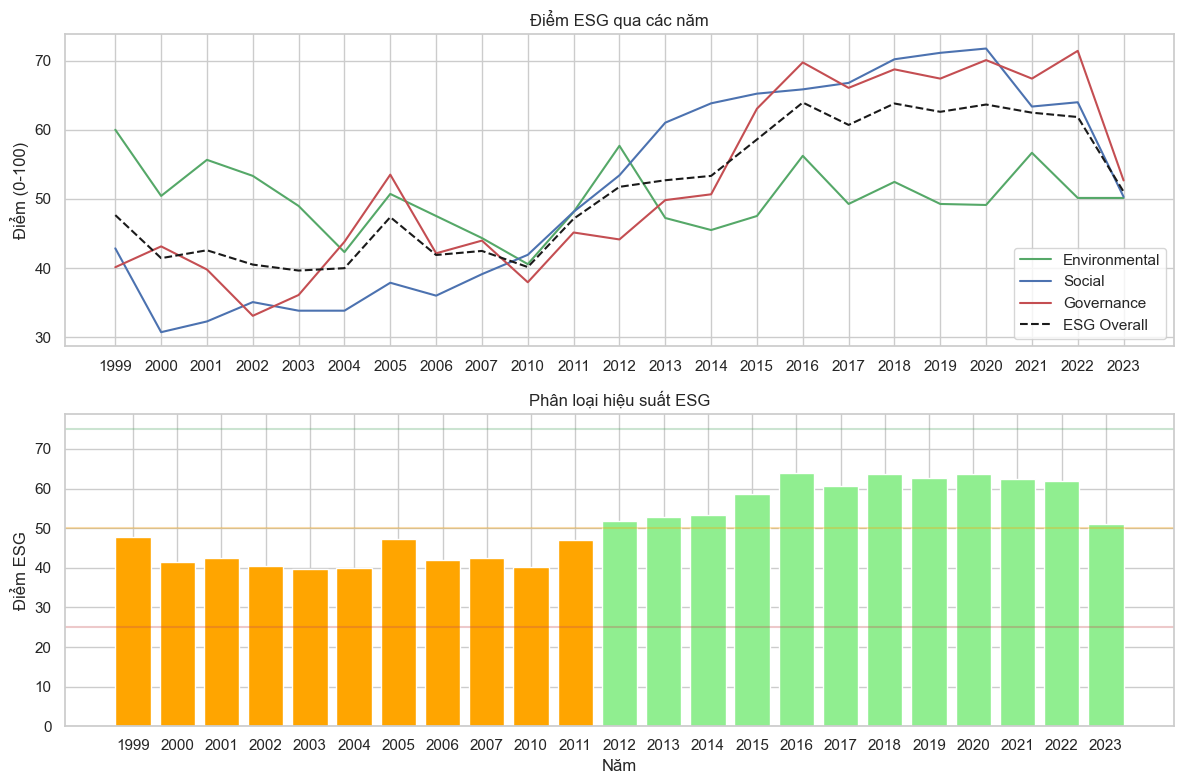


Phân phối score range:
Calculated_score_range
Third Quartile     12
Second Quartile    11
First Quartile      0
Fourth Quartile     0
Name: count, dtype: int64

So sánh dự đoán và tính toán:
Predicted        Second Quartile  Third Quartile
Actual                                          
Second Quartile               10               1
Third Quartile                 0              12


In [22]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Đọc dữ liệu

# Tính điểm ESG và phân loại
esg_scored_data = calculate_esg_score(final_df)

# Xây dựng mô hình phân loại
model, scaler = build_esg_classification_model(esg_scored_data)

# Đánh giá hiệu suất ESG
results = evaluate_esg_performance(model, scaler, final_df)

# Hiển thị kết quả phân tích
print("\nPhân phối score range:")
print(results['Calculated_score_range'].value_counts())

print("\nSo sánh dự đoán và tính toán:")
comparison = pd.crosstab(results['Calculated_score_range'], 
                         results['Predicted_score_range'], 
                         rownames=['Actual'], 
                         colnames=['Predicted'])
print(comparison)

Mô hình có độ chính xác tổng thể tốt (80%).
Recall hoàn hảo (1.00) cho lớp "Third Quartile" - không bỏ sót mẫu nào thuộc lớp này.
Precision hoàn hảo (1.00) cho lớp "Second Quartile" - không phân loại nhầm mẫu vào lớp này.

5. Kết luận
Hệ thống này cho phép đánh giá hiệu suất ESG của Việt Nam dựa trên 71 chỉ số, phân loại vào các phạm vi điểm và dự đoán xu hướng phát triển trong tương lai. Mô hình có thể được điều chỉnh theo đặc thù của Việt Nam và các dự án cộng đồng cụ thể, đảm bảo đánh giá phù hợp với bối cảnh kinh tế-xã hội của đất nước.

In [23]:
# Tạo dữ liệu cho dự án EIA 2023 dựa trên báo cáo
data_eia2023 = final_df.loc['2023'].to_dict()
# Cập nhật các giá trị dựa trên báo cáo dự án EIA 2023
data_eia2023.update({
    # Environmental indicators
    'CO2 emissions': 30.0,                       # Cải tạo hệ thống điện tiết kiệm năng lượng, sử dụng lưới che thay vật liệu đặc
    'Methane emissions': 40.0,                   # Cải thiện hệ thống nước thải
    'Nitrous oxide emissions': 40.0,             # Giảm gián tiếp do tiết kiệm năng lượng
    'Adjusted savings: natural resources depletion': 35.0,  # Sử dụng hiệu quả tài nguyên
    'Adjusted savings: net forest depletion': 25.0,         # Có trồng cây bù đắp
    'Agricultural land': 60.0,                   # Không liên quan trực tiếp
    'Annual freshwater withdrawals': 40.0,       # Cải thiện hệ thống nước
    'Cooling Degree Days': 55.0,                 # Mái che giúp giảm nhiệt
    'Forest area': 85.0,                         # Hoạt động trồng cây phủ xanh
    'Heat Index 35': 45.0,                       # Xây dựng mái che giảm nhiệt
    'Heating Degree Days': 50.0,                 # Không áp dụng nhiều trong khí hậu nhiệt đới
    'Land Surface Temperature': 65.0,            # Xây dựng mái che giảm nhiệt
    'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources': 35.0,               # Cải thiện hệ thống nước
    'Renewable energy consumption': 50.0,        # Không đề cập cụ thể
    'Standardised Precipitation-Evapotranspiration Index': 50.0,  # Không đề cập

    # Social indicators
    'Access to clean fuels and technologies for cooking': 50.0,   # Không đề cập
    'Access to electricity': 85.0,               # Cải tạo hệ thống điện chiếu sáng
    'People using safely managed drinking water services': 80.0,  # Cải tạo hệ thống cấp nước
    'People using safely managed sanitation services': 85.0,      # Cải tạo nhà vệ sinh
    'School enrollment': 85.0,                   # Cải thiện điều kiện học tập
    'Food production index': 50.0,               # Không đề cập
    'Fertility rate': 50.0,                      # Không liên quan trực tiếp
    'Labor force participation rate': 70.0,      # Thúc đẩy tham gia hoạt động cộng đồng
    'Life expectancy at birth': 65.0,            # Cải thiện điều kiện vệ sinh
    'Mortality rate': 25.0,                      # Hoạt động dạy bơi giảm nguy cơ đuối nước
    'Population ages 65 and above': 50.0,        # Không liên quan trực tiếp
    'Population density': 50.0,                  # Không liên quan trực tiếp
    'Ratio of female to male labor force participation rate': 65.0,  # 7 nữ trong 19 thành viên
    'Unemployment': 40.0,                        # Tạo việc làm tạm thời

    # Governance indicators
    'GDP growth': 55.0,                          # Đóng góp nhỏ vào phát triển kinh tế
    'Individuals using the Internet': 60.0,      # Cải thiện hệ thống điện
    'Agriculture': 55.0,                         # Dự án tại vùng nông thôn
    'Control of Corruption: Estimate': 70.0,     # Phân bổ ngân sách rõ ràng
    'Government Effectiveness: Estimate': 80.0,  # Kế hoạch dự án chi tiết
    'Net migration': 50.0,                       # Không đề cập
    'Patent applications': 55.0,                 # Có thiết kế kỹ thuật mới
    'Political Stability and Absence of Violence/Terrorism: Estimate': 75.0,  # Dự án ổn định
    'Proportion of seats held by women in national parliaments': 65.0,  # 7 nữ trong 19 thành viên
    'Regulatory Quality: Estimate': 65.0,        # Có quy trình nghiệm thu
    'Rule of Law: Estimate': 75.0,               # Tuân thủ quy định pháp luật
    'Scientific and technical journal articles': 60.0,  # Có tài liệu kỹ thuật
    'Voice and Accountability: Estimate': 65.0   # Nêu rõ điểm cần rút kinh nghiệm
})

# Tạo DataFrame
df_eia2023 = pd.DataFrame([data_eia2023])
df_eia2023.index = ['2023']  # Đặt index là năm dự án
df_eia2023.index.name = 'Year'

# Hiển thị DataFrame
print("Dữ liệu ESG cho dự án EIA 2023:")
print(df_eia2023.head())

# Lưu thành file CSV
df_eia2023.to_csv('EIA2023_ESG_Data.csv')

# Sử dụng mô hình để tính điểm ESG
results = calculate_esg_score(df_eia2023)

print("\nKết quả tính điểm ESG:")
print(f"Điểm Environmental: {results['E_score'].values[0]*10:.1f}/10")
print(f"Điểm Social: {results['S_score'].values[0]*10:.1f}/10")
print(f"Điểm Governance: {results['G_score'].values[0]*10:.1f}/10")
print(f"Điểm ESG tổng thể: {results['ESG_score'].values[0]:.1f}/100")
print(f"Phân loại ESG: {results['score_range'].values[0]}")

# Chuẩn bị dữ liệu cho dự đoán
try:
    # Điều chỉnh tên cột nếu cần
    aligned_data = df_eia2023.copy()
    
    # Đảm bảo dữ liệu có đúng các cột mà mô hình yêu cầu
    if hasattr(model, 'feature_names_in_'):
        required_features = model.feature_names_in_
        for feature in required_features:
            if feature not in aligned_data.columns:
                aligned_data[feature] = 50.0  # Giá trị mặc định
        aligned_data = aligned_data[required_features]
    
    # Chuẩn hóa dữ liệu
    X_scaled = scaler.transform(aligned_data)
    
    # Dự đoán
    predicted_score_range = model.predict(X_scaled)
    predicted_proba = model.predict_proba(X_scaled)
    
    print("\nKết quả dự đoán mô hình:")
    print(f"Phân loại dự đoán: {predicted_score_range[0]}")
    print("Xác suất cho từng phân loại:")
    for i, class_name in enumerate(model.classes_):
        print(f"{class_name}: {predicted_proba[0][i]:.4f}")
        
except Exception as e:
    print(f"\nLỗi khi sử dụng mô hình: {e}")
    print("Bạn có thể cần điều chỉnh dữ liệu hoặc huấn luyện lại mô hình với dữ liệu mới.")

Dữ liệu ESG cho dự án EIA 2023:
      Access to clean fuels and technologies for cooking  \
Year                                                       
2023                                               50.0    

      Access to electricity  Adjusted savings: natural resources depletion  \
Year                                                                         
2023                   85.0                                           35.0   

      Adjusted savings: net forest depletion  Agricultural land  Agriculture  \
Year                                                                           
2023                                    25.0               60.0         55.0   

      Annual freshwater withdrawals  CO2 emissions  \
Year                                                 
2023                           40.0           30.0   

      Control of Corruption: Estimate  Cooling Degree Days  ...  \
Year                                                        ...   
2023          